# Loan Default Prediction

In [63]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [64]:
# Load the data set
df = pd.read_csv("Loan Default.csv")

In [65]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [66]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [67]:
df.BAD.value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

In [68]:
#check for null values in the data
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [69]:
# Filling the null values with mode if column is category, and mean if column is numerical. 
df.fillna({'MORTDUE':df.MORTDUE.mean(), 'VALUE': df.VALUE.mean(), 'REASON':df.REASON.mode()[0], 
          'JOB':df.JOB.mode()[0], 'YOJ':df.YOJ.mean(), 'DEROG':df.DEROG.mean(), 'DELINQ':df.DELINQ.mean(), 
           'CLAGE':df.CLAGE.mean(), 'NINQ':df.NINQ.mean(), 'CLNO':df.CLNO.mean(), 'DEBTINC':df.DEBTINC.mean() }, inplace=True)

In [70]:
# Checking data types
df.dtypes

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [71]:
#check for null values in the data
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [72]:
print(df.duplicated().sum()) #Checking for duplicate rows

0


## EDA

<Axes: >

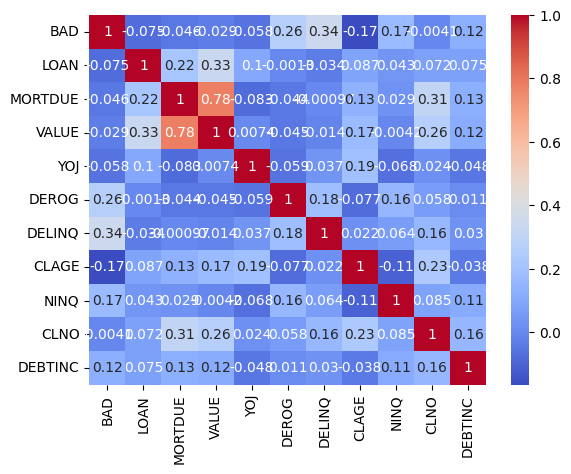

In [73]:
# correlation heatmap of the data set
numeric_df = df.select_dtypes(include=[np.number])
sb.heatmap(numeric_df.corr(), cmap = "coolwarm",  annot=True)

Most the numerical columns has very weak correlation with the target column(BAD)

array([[<Axes: title={'center': 'BAD'}>,
        <Axes: title={'center': 'LOAN'}>,
        <Axes: title={'center': 'MORTDUE'}>],
       [<Axes: title={'center': 'VALUE'}>,
        <Axes: title={'center': 'YOJ'}>,
        <Axes: title={'center': 'DEROG'}>],
       [<Axes: title={'center': 'DELINQ'}>,
        <Axes: title={'center': 'CLAGE'}>,
        <Axes: title={'center': 'NINQ'}>],
       [<Axes: title={'center': 'CLNO'}>,
        <Axes: title={'center': 'DEBTINC'}>, <Axes: >]], dtype=object)

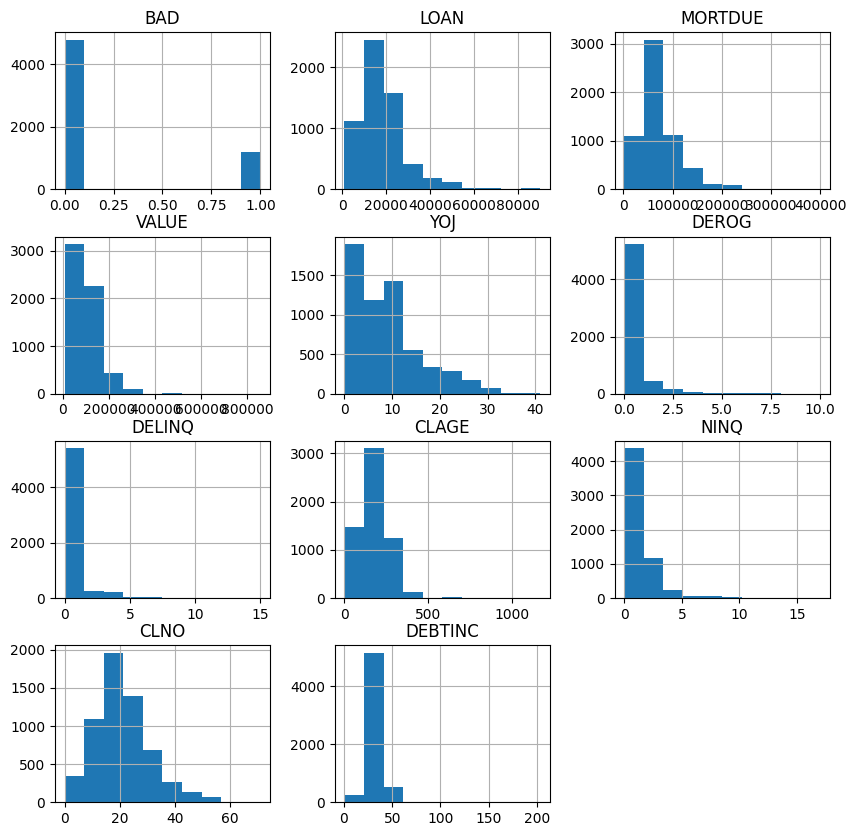

In [74]:
# Checking for skewness in the data
df.hist(figsize=(10,10))

In [75]:
def skew_function():
    
    """ I want to pull out all the skewed columns in the dataframe"""
    
    skew_value = []
    
    for col in df.select_dtypes('number'):
        skew_col = df[col].skew()
        skew_value.append((col , skew_col))
    return sorted(skew_value , key = lambda x : x[1] , reverse = True)

In [76]:
skew_function()

[('DEROG', np.float64(5.667985090578184)),
 ('DELINQ', np.float64(4.234346396768079)),
 ('DEBTINC', np.float64(3.2141908892798194)),
 ('VALUE', np.float64(3.0824293252708372)),
 ('NINQ', np.float64(2.7418564400693493)),
 ('LOAN', np.float64(2.023780711662712)),
 ('MORTDUE', np.float64(1.8988287843829155)),
 ('BAD', np.float64(1.5043166751458978)),
 ('CLAGE', np.float64(1.3795115209552562)),
 ('YOJ', np.float64(1.0341248526816795)),
 ('CLNO', np.float64(0.789894942639266))]

#### Remove target variable from the DataFrame

In [77]:
loan_label = df["BAD"]
raw_df = df.copy()
df.drop("BAD" , axis = 1 , inplace = True)

### Data Preprocessing

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [79]:
 # Standardizing the numerical columns
numerical_cols = list(df.select_dtypes('number').columns)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#### Transform categorical columns

In [80]:
df = pd.get_dummies(df)

In [81]:
df.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.562299,-1.127666e+00,-1.104011e+00,2.179581e-01,-0.320564,-4.196817e-01,-1.022064e+00,-0.112562,-1.236106e+00,9.309958e-16,False,True,False,False,True,False,False,False
1,-1.544453,-8.728829e-02,-5.872016e-01,-2.655546e-01,-0.320564,1.447884e+00,-6.933423e-01,-0.717557,-7.334643e-01,9.309958e-16,False,True,False,False,True,False,False,False
2,-1.526606,-1.418642e+00,-1.496786e+00,-6.799940e-01,-0.320564,-4.196817e-01,-3.626262e-01,-0.112562,-1.135578e+00,9.309958e-16,False,True,False,False,True,False,False,False
3,-1.526606,3.425767e-16,-2.560192e-16,-2.453974e-16,0.000000,-5.183537e-17,3.401514e-16,0.000000,3.571484e-16,9.309958e-16,True,False,False,False,True,False,False,False
4,-1.508759,5.659230e-01,1.798751e-01,-8.181404e-01,-0.320564,-4.196817e-01,-1.034431e+00,-0.717557,-7.334643e-01,9.309958e-16,False,True,False,True,False,False,False,False


## Spliting Data into Training and Testing

In [82]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df, loan_label, test_size=.2, random_state=True)

In [84]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(4768, 18)
(1192, 18)
(4768,)
(1192,)


In [85]:
X_train.shape

(4768, 18)

### Model training on the data set

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [87]:
# creating an instance of each models
model_1 = LogisticRegression()
#model_1.fit(X_train, y_train)
model_2 = DecisionTreeClassifier()
model_3 = RandomForestClassifier()
model_4 = SVC()

In [88]:
# Model evaluation function
def eval(Model):
    Model = Model.fit(X_train , y_train)
    Model_predict_train = Model.predict(X_train)
    Model_predict_test = Model.predict(X_test)
    
    accuracy_score_train = accuracy_score(Model_predict_train , y_train)
    accuracy_score_test = accuracy_score(Model_predict_test , y_test)
    
    print (f"The model has an accuracy score of {accuracy_score_train} on training and {accuracy_score_test} on testing.")

### Model Evaluation

In [89]:
eval(model_1)

The model has an accuracy score of 0.8418624161073825 on training and 0.8154362416107382 on testing.


In [90]:
eval(model_2)

The model has an accuracy score of 1.0 on training and 0.8766778523489933 on testing.


In [91]:
eval(model_3)

The model has an accuracy score of 1.0 on training and 0.924496644295302 on testing.


In [92]:
eval(model_4)

The model has an accuracy score of 0.8968120805369127 on training and 0.8666107382550335 on testing.


Model_3(RandomForestClassifier) has the best accuracy of 1.0 and 0.92 on training and testing dataset respectively. While model_2(DecisionTreeClassifier) overfits more. Model_4(SVC) is slightly low, while Model_1(LogisticRegression) has lowest accuracy on both training and testing dataset.

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [94]:
cross_val_score(model_1 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.83773585, 0.83511643, 0.84581498])

In [95]:
cross_val_score(model_2 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.87735849, 0.8628068 , 0.86721208])

In [96]:
cross_val_score(model_3 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.92138365, 0.91692889, 0.90937697])

In [97]:
cross_val_score(model_4 , X_train ,y_train ,  cv = 3, scoring="accuracy")

array([0.86855346, 0.87916929, 0.86784141])

In [98]:
predictions = cross_val_predict(model_4, X_train, y_train, cv=4)
predictions

array([1, 0, 0, ..., 0, 0, 0], shape=(4768,))

In [99]:
from sklearn.metrics import classification_report, confusion_matrix

In [100]:
y_predict = model_3.predict(X_test)
print(classification_report(y_test, y_predict)) #print classification report

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       944
           1       0.91      0.71      0.80       248

    accuracy                           0.92      1192
   macro avg       0.92      0.84      0.87      1192
weighted avg       0.92      0.92      0.92      1192



In [101]:
y_predict_4 = model_4.predict(X_test)
print(classification_report(y_test, y_predict_4)) #print classification report

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       944
           1       0.99      0.36      0.53       248

    accuracy                           0.87      1192
   macro avg       0.92      0.68      0.73      1192
weighted avg       0.88      0.87      0.84      1192



model_3: Precision = 0.93, Recall = 0.85, F1-score = 0.88

model_4: Precision = 0.92, Recall = 0.68, F1-score = 0.73


In [102]:
cm_3 = confusion_matrix(y_test, y_predict)
print(cm_3, "\n")

cm_4 = confusion_matrix(y_test, y_predict_4)
print(cm_4)

[[927  17]
 [ 73 175]] 

[[943   1]
 [158  90]]


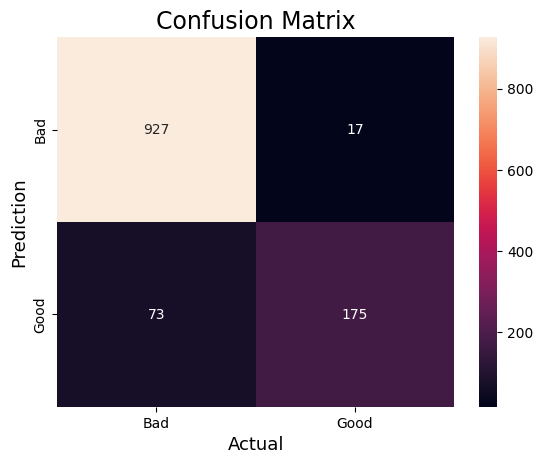

In [103]:
#Plot the confusion matrix.
sb.heatmap(cm_3,
            annot=True,
            fmt='g',
            xticklabels=['Bad', 'Good'],
            yticklabels=['Bad', 'Good'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Conclusion
model_3(RandomForestClassifier) report indicates a classifier that maintains a good balance between capturing most instances of both classes and keeping false positives low. While model_4(SVC) report, while ensuring all class 0 cases are detected, significantly underperforms in identifying class 1 instances, leading to lower overall accuracy and F1-scores. Therefore, model_3(RandomForestClassifier) would generally be more reliable.

## Hyperparameter Tuning Using GridsearchCV

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
# # defining parameter range
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }



# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, scoring='accuracy', n_jobs=-1)
# # fitting the model for grid search
# grid_search.fit(X_train, y_train)

In [106]:
# print best parameter after tuning
print("Best Parameters:", grid_search.best_params_)

# print how our model looks after hyper-parameter tuning
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.9205092161792947


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions (example with ranges)
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(100, 500, num=5)],
    'max_depth': [None] + [int(x) for x in np.linspace(10, 50, num=5)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50}
Best Score: 0.9202997925562221


In [112]:
random_predict = random_search.predict(X_test)

# print classification report
print(classification_report(y_test, random_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       944
           1       0.92      0.69      0.79       248

    accuracy                           0.92      1192
   macro avg       0.92      0.84      0.87      1192
weighted avg       0.92      0.92      0.92      1192



In [113]:
cm = confusion_matrix(y_test, random_predict)
cm

array([[930,  14],
       [ 76, 172]])